In [114]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import math
import random
import time

In [115]:
# Encontra na lista de pontos o primeiro terminal e o define como base
# Faz uma lista com as combinações entre o terminal base e todos os outros terminais
# lista fica da seguinte forma [(base, terminal_1), (base, terminal_2), ... , (base, terminal_n)]
# Para cada base e terminal encontra o menor caminho, usando abordagem gulosa:
    # Começa pela base
    # Vai para o vertice mais proximo
    # Adiciona a aresta percorrida nas arestas da arvore de Steiner
    # Confere se o vertice é o terminal de destino do par
        # Se for o destino, para a função
        # Se não for atualiza a base para o vertice em que o programa está




In [116]:
def calcular_distancia_euclidiana(origem, destino):
    return math.sqrt((destino[0] - origem[0])**2 + (destino[1] - origem[1])**2)

In [117]:
def busca_caminho_guloso(G, origem, destino): # n^2
    visitados = []
    menor_destino = None
    
    while(origem != destino): # n

        menor_distancia = math.inf
        visitados.append(origem)

        # Procura o menor caminho até o próximo vértice
        for node in G.nodes(): # n
            if(node in visitados):
                continue

            if(G.edges[origem, node]['peso'] < menor_distancia):
                menor_destino = node
                menor_distancia = G.edges[origem, node]['peso']
        
        # Adiciona o vértice de menor peso à solução
        ST.add_edge(origem, menor_destino, peso=menor_distancia)
        
        # Refaz, considerando como origem o vértice encontrado
        origem = menor_destino

In [118]:
quantidade_pontos = 100
quantidade_terminais = random.randint(1, quantidade_pontos)

pontos = []
for _ in range(quantidade_pontos):
    x = random.randint(0, 100)  # Gera um número aleatório entre 0 e 10 para a coordenada x
    y = random.randint(0, 100)  # Gera um número aleatório entre 0 e 10 para a coordenada y
    pontos.append((x, y))

terminais_indices = []
for _ in range(quantidade_terminais):
    terminais_indices.append(random.randint(0, quantidade_pontos))

terminais = []
for terminal in terminais_indices:
    try:
        terminais.append(pontos[terminal])
    except IndexError:
        print('Terminal não encontrado')

In [119]:
G = nx.Graph() # Grafo original
G.add_nodes_from(pontos) # Adiciona o conjunto de pontos

In [120]:
# Transforma os pontos originais em um grafo completo
for i, origem in enumerate(G.nodes()):
    for j, destino in enumerate(G.nodes()):
        if(j > i):
            distancia = calcular_distancia_euclidiana(origem, destino)
            G.add_edge(origem, destino, peso=distancia)

In [121]:
ST = nx.Graph() # Grafo com os a arvore geométrica de Steiner mínima

# Fazer a busca entre a origem e todos os terminais, um a um
origem = terminais[0]

tempo_inicio = time.time()
for destino in terminais: # m
    busca_caminho_guloso(G, origem, destino) # n^2

tempo_total = time.time() - tempo_inicio

# Complexidade total fica n^2*m (sendo n o número de vertices e m o número de terminais)

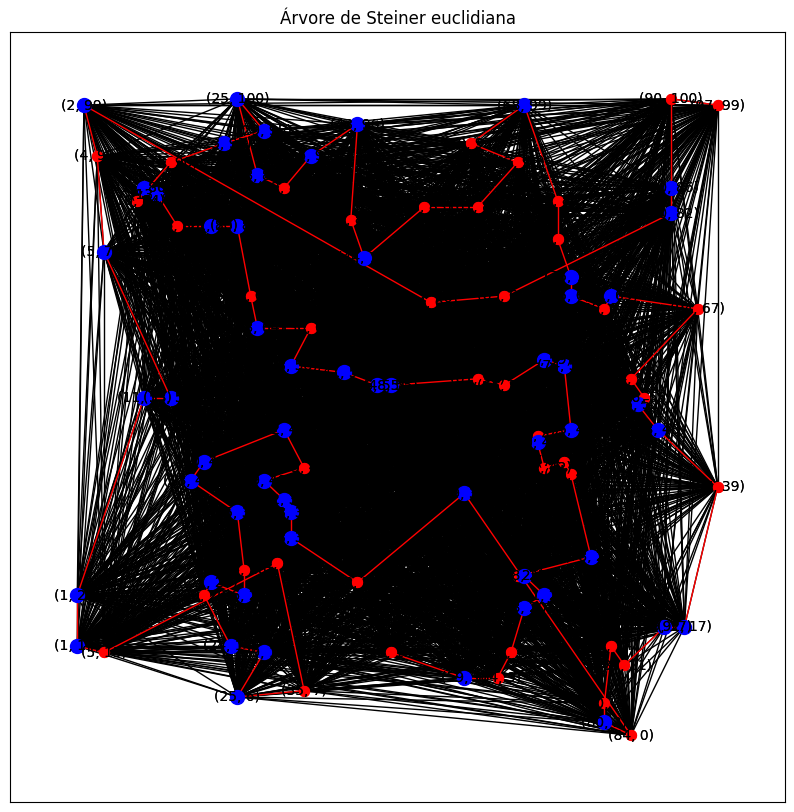

In [122]:
plt.figure(figsize=(10, 10))
position = {v: v for v in pontos}
nx.draw_networkx(G, pos=position, node_size=50, node_color='red', edge_color='black', font_size='10')
nx.draw_networkx(ST, pos=position, node_size=50, node_color='red', edge_color='red', font_size='10')
labels = nx.get_edge_attributes(G, 'peso')
rounded_labels = {edge: f'{weight:.1f}' for edge, weight in labels.items()}
#nx.draw_networkx_edge_labels(G, position, edge_labels=rounded_labels)


pontos_nao_terminais = [ponto for ponto in pontos if ponto not in terminais]
x_nao_terminais, y_nao_terminais = zip(*pontos_nao_terminais)

plt.scatter(x_nao_terminais, y_nao_terminais, color='blue', zorder=2, s=100)

plt.title('Árvore de Steiner euclidiana')
plt.show()